Importing the basic libraries and loading the dataset.

In [1]:
%matplotlib inline
import numpy as np #for mathematical and array functionalities
import pandas as pd #for dataframe
import io #for IO operations
from pylab import *
import matplotlib.pyplot as plt #for plots

from google.colab import files
uploaded = files.upload() #upload function
df = pd.read_csv(io.BytesIO(uploaded['suicidedata.csv'])) #reading csv file
df.head() #top of the loaded data

Saving suicidedata.csv to suicidedata.csv


,YEAR,MALE,FEMALE,TOTAL,UNEMPLOYED,DRUGS,HOMELESS
0,2000,395,91,486,114,94,65
1,2001,429,91,520,151,119,78
2,2002,387,91,478,141,121,84
3,2003,386,111,497,151,132,91
4,2004,406,87,493,169,126,103


Note that I chose not to trim the outliers due to the low size of the  dataset and this will affect the efficiency of the models. The relation between the total number of deaths and the year is considered in both linear and polynomial regression.

Generating a co-relation heatmap. It's clear that our data has no co-relation apart from the years and a small portion of total number of suicides and homeless people.

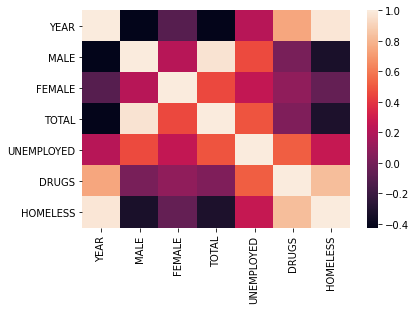

In [2]:
import seaborn as sns #for co-relation
corr=df.corr() #co-relation function
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values) #plotting heatmap

**Linear Regression**



Assigning columns and rows to variables

In [3]:
y=df['YEAR'] #value of years to y
total=df['TOTAL'] #assigning total number of suicides

In [4]:
from scipy import stats #library for evaluation
slope, intercept, r_value, p_value, std_err = stats.linregress(total, y) # regression function returning values against total and years

In [5]:
std_err

0.028414594280825368

In [6]:
r_value ** 2

0.1736469526079386

Clearly, linear regression fails to make any sense with the predictions as there's no linear co-relation between the data. The outlier values and the variations throws it off and the limited number of data points also plays it's part. But it's safe to assume the numbers are going down.

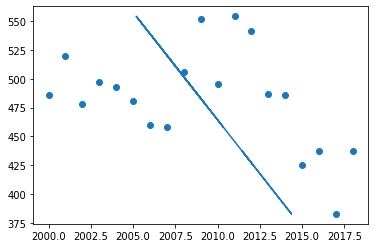

In [9]:
def predict(total):
    return slope * total + intercept # defining prediction function using the slope

fitLine = predict(total) #calling the function and assigning returned value to the variable

plt.scatter(y,total)
plt.plot(fitLine,total)
plt.show() #plotting the values on a graph

**Polynomial Regression**

In [10]:
p4 = np.poly1d(np.polyfit(y, total, 2)) #applying polynomial function of the order 2

In [11]:
from sklearn.metrics import r2_score #regression score function

r2 = r2_score(y, p4(total))
print(r2)  #Clearly as expected, the model isn't able to fit in the data

-112087052476.75655


Even though not fitting perfectly, polynomial regression gives better defined predictions with respect to linear regression and it predicts the suicide rates will fall gradually towards the future.

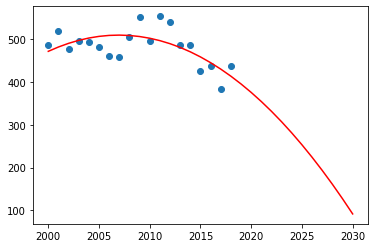

In [12]:
xp = np.linspace(2000, 2030, 31) #defining an array betweer 2000-2030 with 31 steps in between
plt.scatter(y, total)
plt.plot(xp, p4(xp) , c='r') #plotting our extended graph
plt.show()

**Support Vector Machine-Regression**

Not much data pre-processing is involved as they are simple and straightforward. I'm considering the relation between the number of deaths and the contributing attributes.

In [13]:
features = list(df.columns[4:]) #collecting the supporting column headers
feat = df[features] #storing the respective values of the collected columns

Using polynomial kernel.

In [14]:
from sklearn.svm import SVR #importing the model for support vector regression

C = 1.0
svc = SVR(kernel='poly', C=C).fit(feat,total) #loading the model

In [15]:
print(svc.predict([[365,176,131]])) #Returns the number of suicides on the sampleinput data

[536.76754765]


SVMs does a pretty decent job in predicting the suicide rates with close enough values considering the low number of training data.

**Decision Trees** & Random Forest Classifier. Using the same features and variables as before

Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier #library for random forest classifier
clf = RandomForestClassifier(n_estimators=100) #using 100 branches
clf = clf.fit(feat, total) #loading the model

Similar to SVMs, Random Forest Classifier also returns a close enough output.

In [17]:
print(clf.predict([[231,195,146]])) #prediction with sample input

[506]


Generating a Decision Tree

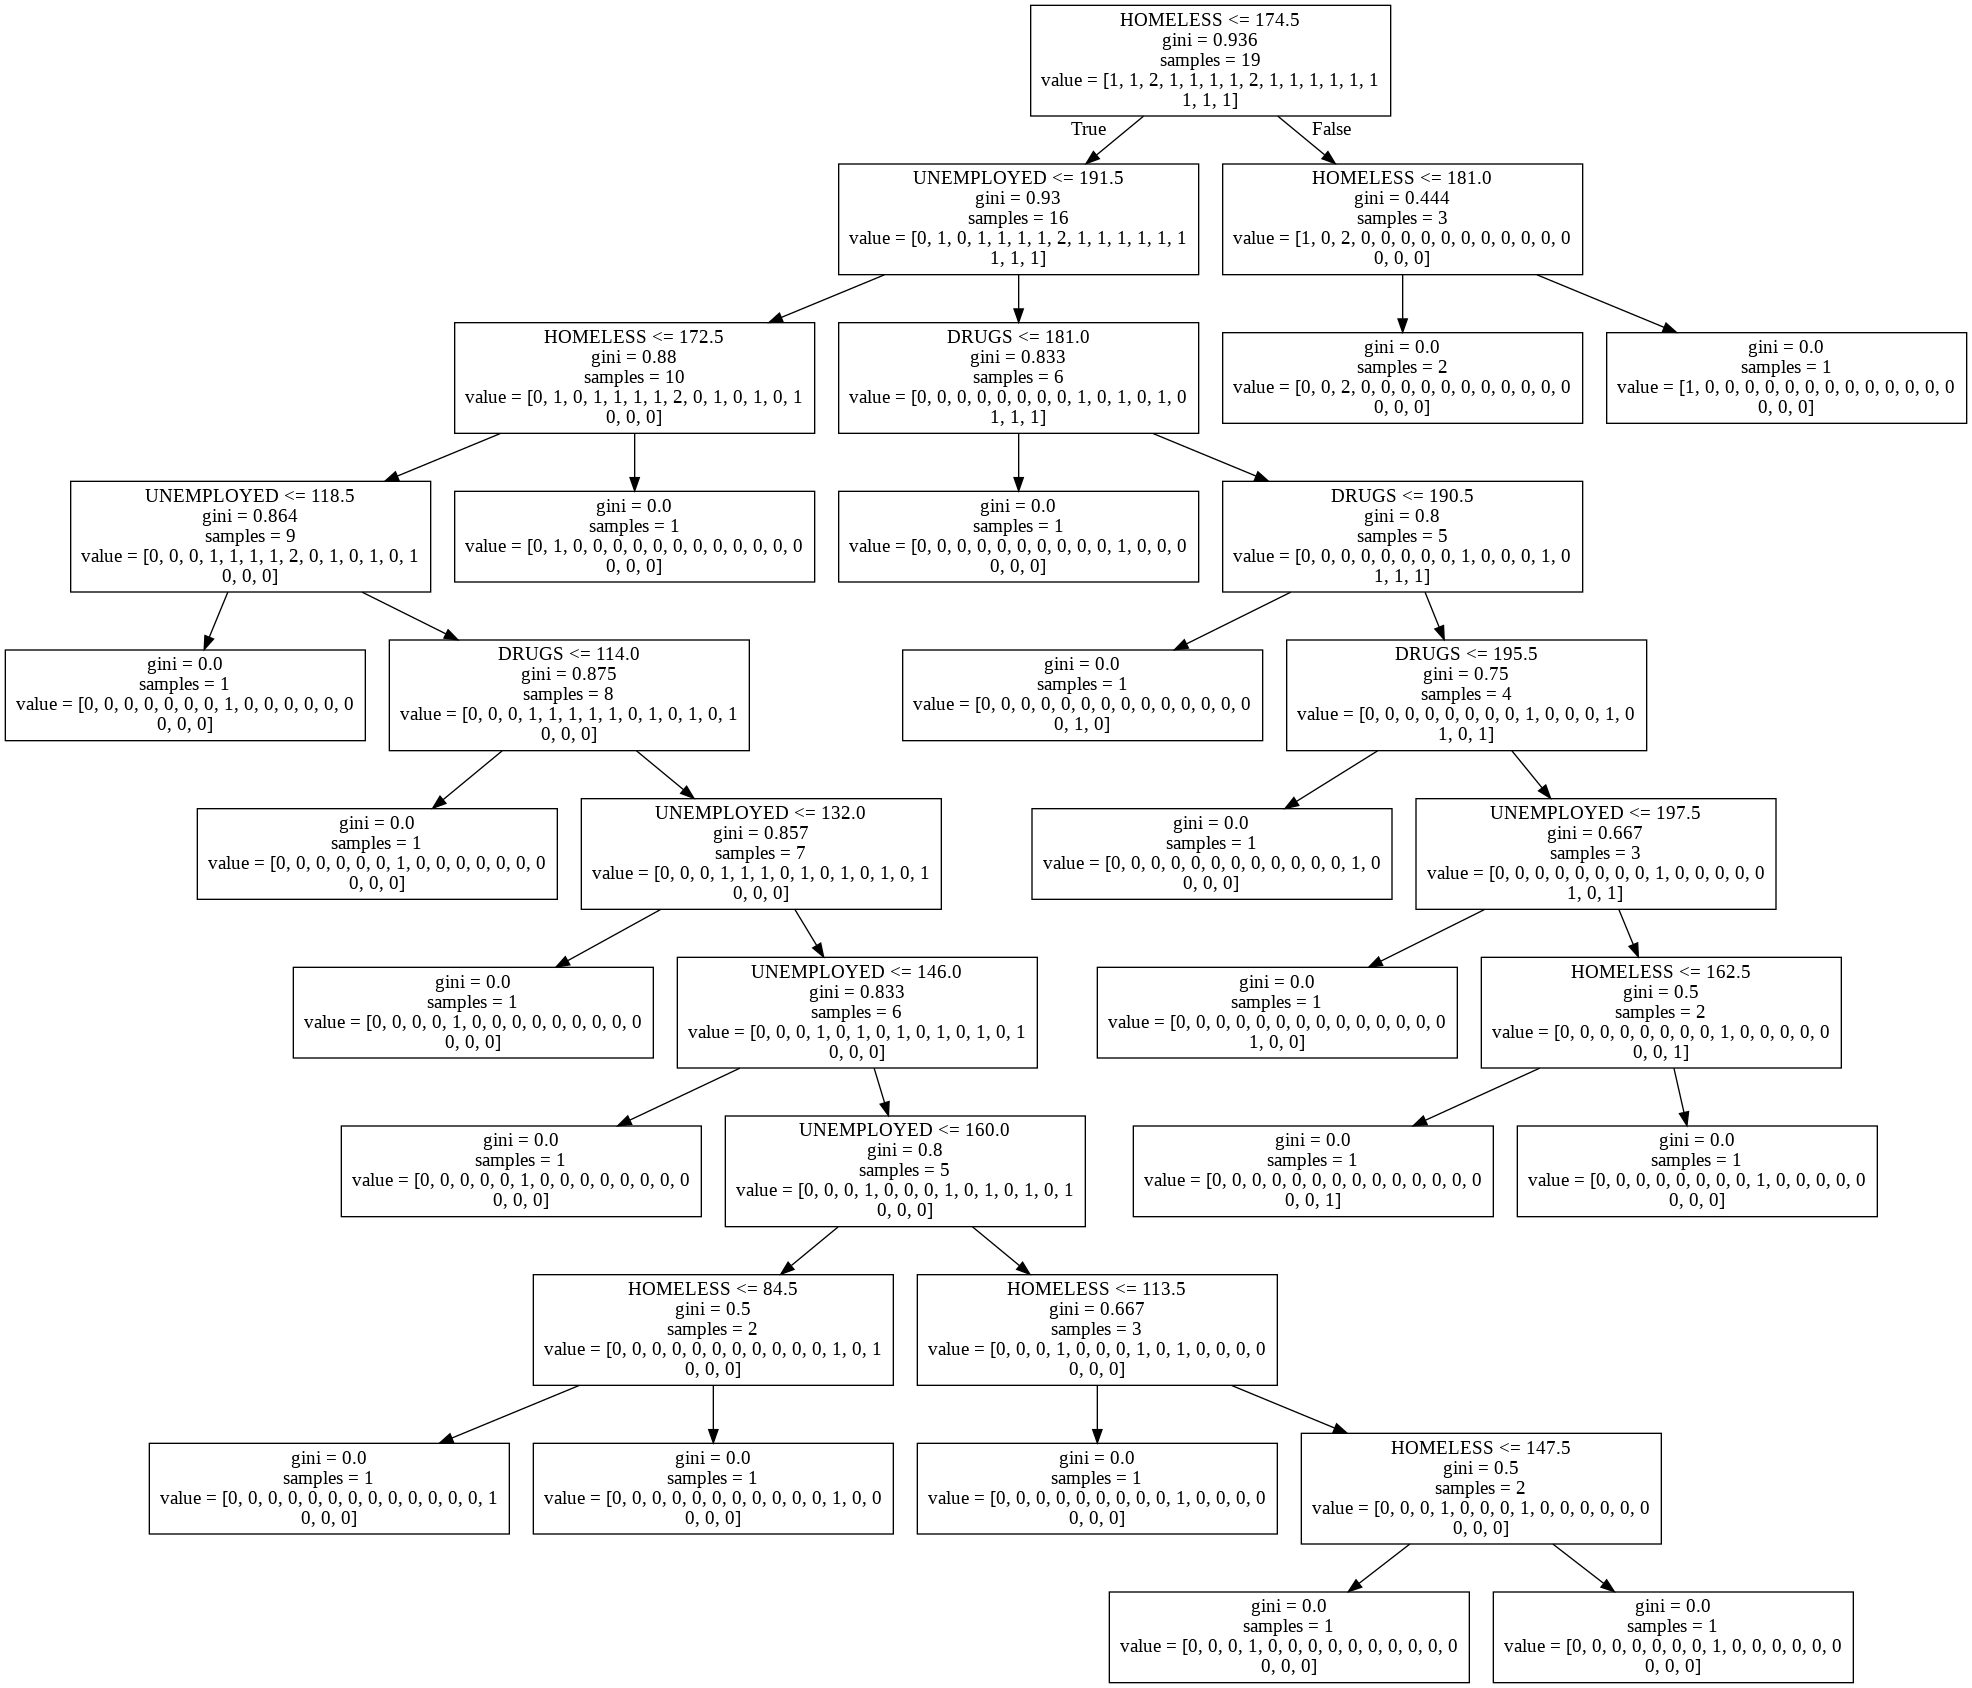

In [38]:
from sklearn import tree #module for decision tree
clft = tree.DecisionTreeClassifier()
clft = clft.fit(feat,total) #loading the model
from IPython.display import Image  
from sklearn.externals.six import StringIO  #modules for drawing the flowchart
import pydot

dot_data = StringIO()  
tree.export_graphviz(clft, out_file=dot_data,  
                         feature_names=features)  #loading the decision tree module with the supporting attributes as the headers
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  